# Visualizing the progress of a language migration

or: how to show non-developers that we're working under the hood of a software system successfully

### Take a look at the raw dataset

In [1]:
!head ../dataset/angular_file_commit_history_subset.csv

sha,timestamp,action,file_path
6ef2121e6a7fd07d6475e67fe215cca6faf48ec1,2015-12-27 08:05:25,A,modules/angular2/src/common/pipes/replace_pipe.ts
6ef2121e6a7fd07d6475e67fe215cca6faf48ec1,2015-12-27 08:05:25,A,modules/angular2/test/common/pipes/replace_pipe_spec.ts
b0cebdba6b65c1e9e7eb5bf801ea42dc7c4a7f25,2015-12-15 16:38:27,A,modules/angular2/platform/testing/browser.ts
b0cebdba6b65c1e9e7eb5bf801ea42dc7c4a7f25,2015-12-15 16:38:27,A,modules/angular2/platform/testing/browser_static.ts
b0cebdba6b65c1e9e7eb5bf801ea42dc7c4a7f25,2015-12-15 16:38:27,A,modules/angular2/platform/testing/server.ts
b0cebdba6b65c1e9e7eb5bf801ea42dc7c4a7f25,2015-12-15 16:38:27,A,tools/cjs-jasmine/test-cjs-main.js
7ae23adaff2990cf6022af9792c449730d451d1d,2015-12-02 10:35:51,D,modules/angular2/src/compiler/command_compiler.ts
7ae23adaff2990cf6022af9792c449730d451d1d,2015-12-02 10:35:51,A,modules/angular2/src/compiler/proto_view_compiler.ts
7ae23adaff2990cf6022af9792c449730d451d1d,2015-12-02 10:35:51,A,modules/angular2/

### Read in the data from Git log

In [2]:
import pandas as pd

log = pd.read_csv("../dataset/angular_file_commit_history_subset.csv", parse_dates=[1])
log.head()

,sha,timestamp,action,file_path
0,6ef2121e6a7fd07d6475e67fe215cca6faf48ec1,2015-12-27 08:05:25,A,modules/angular2/src/common/pipes/replace_pipe.ts
1,6ef2121e6a7fd07d6475e67fe215cca6faf48ec1,2015-12-27 08:05:25,A,modules/angular2/test/common/pipes/replace_pip...
2,b0cebdba6b65c1e9e7eb5bf801ea42dc7c4a7f25,2015-12-15 16:38:27,A,modules/angular2/platform/testing/browser.ts
3,b0cebdba6b65c1e9e7eb5bf801ea42dc7c4a7f25,2015-12-15 16:38:27,A,modules/angular2/platform/testing/browser_stat...
4,b0cebdba6b65c1e9e7eb5bf801ea42dc7c4a7f25,2015-12-15 16:38:27,A,modules/angular2/platform/testing/server.ts


### Get the info about the programming language used

In [3]:
log['lang'] = log['file_path'].str.rsplit(".", n=1).str[-1]
log.head()

,sha,timestamp,action,file_path,lang
0,6ef2121e6a7fd07d6475e67fe215cca6faf48ec1,2015-12-27 08:05:25,A,modules/angular2/src/common/pipes/replace_pipe.ts,ts
1,6ef2121e6a7fd07d6475e67fe215cca6faf48ec1,2015-12-27 08:05:25,A,modules/angular2/test/common/pipes/replace_pip...,ts
2,b0cebdba6b65c1e9e7eb5bf801ea42dc7c4a7f25,2015-12-15 16:38:27,A,modules/angular2/platform/testing/browser.ts,ts
3,b0cebdba6b65c1e9e7eb5bf801ea42dc7c4a7f25,2015-12-15 16:38:27,A,modules/angular2/platform/testing/browser_stat...,ts
4,b0cebdba6b65c1e9e7eb5bf801ea42dc7c4a7f25,2015-12-15 16:38:27,A,modules/angular2/platform/testing/server.ts,ts


### Map added and deleted lines to numbers

In [4]:
log.loc[log['action'] == "A", "count"] = 1
log.loc[log['action'] == "D", "count"] = -1
log.head()

,sha,timestamp,action,file_path,lang,count
0,6ef2121e6a7fd07d6475e67fe215cca6faf48ec1,2015-12-27 08:05:25,A,modules/angular2/src/common/pipes/replace_pipe.ts,ts,1.0
1,6ef2121e6a7fd07d6475e67fe215cca6faf48ec1,2015-12-27 08:05:25,A,modules/angular2/test/common/pipes/replace_pip...,ts,1.0
2,b0cebdba6b65c1e9e7eb5bf801ea42dc7c4a7f25,2015-12-15 16:38:27,A,modules/angular2/platform/testing/browser.ts,ts,1.0
3,b0cebdba6b65c1e9e7eb5bf801ea42dc7c4a7f25,2015-12-15 16:38:27,A,modules/angular2/platform/testing/browser_stat...,ts,1.0
4,b0cebdba6b65c1e9e7eb5bf801ea42dc7c4a7f25,2015-12-15 16:38:27,A,modules/angular2/platform/testing/server.ts,ts,1.0


### Group changes to weekly numbers

In [5]:
log_timed = log.groupby(
    [pd.Grouper(key="timestamp", freq="1w"), "lang"])['count'].sum()
log_timed.head()

timestamp   lang
2014-09-21  js      24.0
2014-09-28  js      21.0
2014-10-05  js      22.0
2014-10-12  js       5.0
2014-10-19  js       6.0
Name: count, dtype: float64

### Calculate data for showing the progress

In [6]:
log_timed_unstacked = log_timed.unstack().fillna(0).cumsum()
log_timed_unstacked.head()

lang,js,ts
timestamp,,
2014-09-21,24.0,0.0
2014-09-28,45.0,0.0
2014-10-05,67.0,0.0
2014-10-12,72.0,0.0
2014-10-19,78.0,0.0


### Visualize the progress of the migration

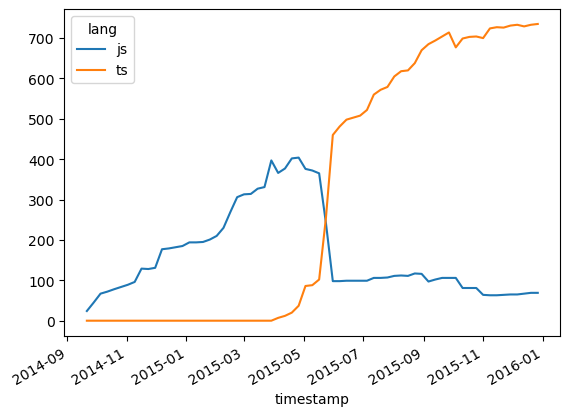

In [7]:
log_timed_unstacked.plot();

### End